## Install Libs

In [3]:
# pip install statsmodels

In [6]:
# pip install keyboard

## Imposts

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import keyboard

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC  # Maquina de Vetor Suporte SVM
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier  # RandomForest
from sklearn.neighbors import KNeighborsClassifier  # k-vizinhos mais próximos(KNN)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [12]:
import warnings

In [13]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Função para carregar o dataset

In [33]:
def load_data(file_path):
    df = pd.read_csv(file_path, decimal=',', sep=';')
    return df


# Análise exploratória

In [17]:
def explore_data(df):
    print(df.head(10))
    print(df.shape)
    print(df.info())
    print(df.isnull().sum())
    print(df.describe())
    print(df.duplicated())
    print(df.columns)
    for coluna in df.columns:
        print(df.value_counts(coluna))

    sns.regplot(data=df, x="encargos", y="idade", logx=True)
    plt.show()

    sns.histplot(df['idade'])
    plt.title('Distribuição por idade')
    plt.show()

# Pré-processamento

In [20]:
def preprocess_data(df):
    le = LabelEncoder()
    df_encoded = df.copy()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = le.fit_transform(df_encoded[col])

    # Tratamento de valores ausentes (NaN) - Remover
    df_encoded.dropna(axis=0, how='any', inplace=True)

    return df_encoded

# Correlação e visualização

In [35]:
def visualize_correlations(df_encoded):
    sns.heatmap(df_encoded.corr(), annot=True, cmap='Greens')
    plt.title('Correlação geral')
    plt.show()

# Preparação dos dados (features e target)

In [21]:
def prepare_data(df_encoded, target_column='encargos'):
    X = df_encoded.drop(columns=[target_column])  # Features
    Y = df_encoded[target_column]  # Target
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

    # Normalização dos dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, Y_train, Y_test

# Modelos de Regressão

## Regressão Linear Simples

In [22]:
def simple_linear_regression(X_train, Y_train, X_test, Y_test):
    regressor = LinearRegression()

    # Considerando apenas uma variável preditora (por exemplo, 'idade')
    X_train_simple = X_train[:, 0].reshape(-1, 1)  # Pegando apenas a primeira coluna (ex: idade)
    X_test_simple = X_test[:, 0].reshape(-1, 1)  # Pegando apenas a primeira coluna (ex: idade)

    regressor.fit(X_train_simple, Y_train)  # Treinando o modelo

    # Previsões nos dados de treino
    y_pred_train = regressor.predict(X_train_simple)
    r2_train = metrics.r2_score(Y_train, y_pred_train)
    mae_train = mean_absolute_error(Y_train, y_pred_train)
    mse_train = mean_squared_error(Y_train, y_pred_train)
    print(f'R² (Treino - Simples): {r2_train:.4f}')
    print(f'MAE (Treino - Simples): {mae_train:.4f}')
    print(f'MSE (Treino - Simples): {mse_train:.4f}')

    # Previsões nos dados de teste
    y_pred_test = regressor.predict(X_test_simple)
    r2_test = metrics.r2_score(Y_test, y_pred_test)
    mae_test = mean_absolute_error(Y_test, y_pred_test)
    mse_test = mean_squared_error(Y_test, y_pred_test)
    print(f'R² (Teste - Simples): {r2_test:.4f}')
    print(f'MAE (Teste - Simples): {mae_test:.4f}')
    print(f'MSE (Teste - Simples): {mse_test:.4f}')

    # Visualização do ajuste da linha de regressão
    plt.scatter(X_train_simple, Y_train, color='blue', label='Dados de treino')
    plt.plot(X_train_simple, y_pred_train, color='red', label='Linha de Regressão')
    plt.title('Regressão Linear Simples')
    plt.xlabel('Idade')
    plt.ylabel('Encargos')
    plt.legend()
    plt.show()

    return regressor

## Regressão Linear Múltipla

In [23]:
def multiple_linear_regression(X_train, Y_train, X_test, Y_test, regularization=None, alpha=1.0):
    if regularization == 'ridge':
        regressor = Ridge(alpha=alpha)  # Ridge Regression (Regularização L2)
    elif regularization == 'lasso':
        regressor = Lasso(alpha=alpha)  # Lasso Regression (Regularização L1)
    else:
        regressor = LinearRegression()  # Regressão Linear Simples sem regularização

    # Treinando o modelo
    regressor.fit(X_train, Y_train)

    # Previsões nos dados de treino
    y_pred_train = regressor.predict(X_train)
    r2_train = metrics.r2_score(Y_train, y_pred_train)
    mae_train = mean_absolute_error(Y_train, y_pred_train)
    mse_train = mean_squared_error(Y_train, y_pred_train)
    print(f'R² (Treino - Múltipla): {r2_train:.4f}')
    print(f'MAE (Treino - Múltipla): {mae_train:.4f}')
    print(f'MSE (Treino - Múltipla): {mse_train:.4f}')

    # Previsões nos dados de teste
    y_pred_test = regressor.predict(X_test)
    r2_test = metrics.r2_score(Y_test, y_pred_test)
    mae_test = mean_absolute_error(Y_test, y_pred_test)
    mse_test = mean_squared_error(Y_test, y_pred_test)
    print(f'R² (Teste - Múltipla): {r2_test:.4f}')
    print(f'MAE (Teste - Múltipla): {mae_test:.4f}')
    print(f'MSE (Teste - Múltipla): {mse_test:.4f}')

    # Gráfico de dispersão para as previsões
    plt.scatter(Y_test, y_pred_test, color='green')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', label="Ideal")
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.title('Regressão Linear Múltipla: Real x Previsto')
    plt.legend()
    plt.show()

    return regressor

# Modelos de Classificação

## Modelo de Árvores de Decisão (corrigido para regressão)

In [24]:
def decision_tree(X_train, Y_train, X_test, Y_test):
    if Y_train.nunique() > 10:
        print("Usando DecisionTreeRegressor (Regressão)")
        dt = DecisionTreeRegressor(random_state=7, criterion='squared_error', max_depth=5, min_samples_split=10)
        is_classification = False
    else:
        print("Usando DecisionTreeClassifier (Classificação)")
        dt = DecisionTreeClassifier(random_state=7, max_depth=5, min_samples_split=10)
        is_classification = True

    # Treinando o modelo
    dt.fit(X_train, Y_train)

    # Realizando previsões
    y_pred_dt = dt.predict(X_test)

    # Avaliação de desempenho
    if is_classification:
        # Para classificação, avaliaremos a acurácia, precisão, recall e f1-score
        accuracy_dt = accuracy_score(Y_test, y_pred_dt)
        precision_dt = precision_score(Y_test, y_pred_dt, average='macro', zero_division=1)
        recall_dt = recall_score(Y_test, y_pred_dt, average='macro', zero_division=1)
        f1_dt = f1_score(Y_test, y_pred_dt, average='macro', zero_division=1)

        print(f'Acurácia (Classificação): {accuracy_dt:.4f}')
        print(f'Precisão (Classificação): {precision_dt:.4f}')
        print(f'Recall (Classificação): {recall_dt:.4f}')
        print(f'F1-Score (Classificação): {f1_dt:.4f}')
    else:
        # Para regressão, avaliamos o R², MAE e MSE
        r2_dt = r2_score(Y_test, y_pred_dt)
        mae_dt = mean_absolute_error(Y_test, y_pred_dt)
        mse_dt = mean_squared_error(Y_test, y_pred_dt)

        print(f'R² (Regressão): {r2_dt:.4f}')
        print(f'MAE (Regressão): {mae_dt:.4f}')
        print(f'MSE (Regressão): {mse_dt:.4f}')

    # Verificar se X_train é um DataFrame ou ndarray
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        feature_names = [f'Feature {i + 1}' for i in range(X_train.shape[1])]

    # Garantir que class_names seja um array-like
    if is_classification:
        class_names = [str(cls) for cls in Y_train.unique()]
    else:
        class_names = None

    # Visualizando a árvore de decisão
    plt.figure(figsize=(12, 8))
    plot_tree(dt, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.title('Árvore de Decisão')
    plt.show()

    # Avaliação cruzada com K-Fold
    scores = cross_val_score(dt, X_train, Y_train, cv=5,
                             scoring='accuracy' if is_classification else 'neg_mean_squared_error')
    print(f'Acurácia cruzada (K-Fold): {scores.mean():.4f} ± {scores.std():.4f}')

    return dt

## Modelo Random Forest

In [25]:
def random_forest(X_train, Y_train, X_test, Y_test):
    # Inicializando o modelo Random Forest Regressor
    rf = RandomForestRegressor(random_state=7)

    # Usando GridSearchCV para encontrar os melhores hiperparâmetros
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Aplicando GridSearchCV para encontrar o melhor modelo
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, Y_train)

    # Melhor modelo após o GridSearch
    best_rf = grid_search.best_estimator_

    # Exibindo os melhores parâmetros
    print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")

    # Realizando previsões com o modelo ajustado
    y_pred_rf = best_rf.predict(X_test)

    # Avaliação do modelo
    r2_rf = r2_score(Y_test, y_pred_rf)  # Avaliando R²
    print(f'R² do modelo RandomForest: {r2_rf:.4f}')

    # Erro Absoluto Médio (MAE)
    mae_rf = mean_absolute_error(Y_test, y_pred_rf)
    print(f'MAE do modelo RandomForest: {mae_rf:.4f}')

    # Erro Quadrático Médio (MSE)
    mse_rf = mean_squared_error(Y_test, y_pred_rf)
    print(f'MSE do modelo RandomForest: {mse_rf:.4f}')

    # Visualizando a importância das características
    feature_importances = best_rf.feature_importances_
    feature_names = [f'Feature {i + 1}' for i in range(X_train.shape[1])]  # Se X_train não for DataFrame

    # Ordenando as importâncias
    sorted_idx = feature_importances.argsort()[::-1]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Importância')
    plt.title('Importância das Características - Random Forest')
    plt.show()

    # Avaliação cruzada com K-Fold
    cv_scores = cross_val_score(best_rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'Acurácia cruzada (K-Fold): {-cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

    return best_rf

## Modelo KNN

In [26]:
def knn(X_train, Y_train, X_test, Y_test):
    """
    Função que treina um modelo de Regressão KNN (K-Nearest Neighbors),
    realiza validação cruzada e avalia a performance nos dados de teste.

    Parâmetros:
    X_train: DataFrame ou ndarray com os dados de entrada de treino
    Y_train: Array ou Series com os valores alvo de treino
    X_test: DataFrame ou ndarray com os dados de entrada de teste
    Y_test: Array ou Series com os valores alvo de teste
    """
    # Configuração do K-Fold (5 divisões)
    kfold = KFold(n_splits=5, shuffle=True, random_state=7)

    # Usando KNeighborsRegressor para regressão
    knn = KNeighborsRegressor(n_neighbors=5)  # Número de vizinhos ajustável

    # Realizando a validação cruzada (K-Fold)
    result_knn = cross_val_score(knn, X_train, Y_train, cv=kfold,
                                 scoring='neg_mean_squared_error')  # Usando erro quadrático médio para regressão

    # Mostrando os resultados da validação cruzada
    print("K-Fold (Erro Quadrático Médio) Scores: {0}".format(result_knn))
    print("Média do Erro Quadrático Médio para K-Fold Cross-Validation: {0:.4f}".format(result_knn.mean()))
    print("Desvio padrão do Erro Quadrático Médio: {0:.4f}".format(result_knn.std()))

    # Treinando o modelo KNN com os dados de treino
    knn.fit(X_train, Y_train)

    # Previsões nos dados de teste
    y_pred_knn = knn.predict(X_test)

    # Avaliação do modelo KNN nos dados de teste
    r2_knn = metrics.r2_score(Y_test, y_pred_knn)
    mae_knn = mean_absolute_error(Y_test, y_pred_knn)
    mse_knn = mean_squared_error(Y_test, y_pred_knn)

    print(f'R² do modelo KNN (Teste): {r2_knn:.4f}')
    print(f'MAE do modelo KNN (Teste): {mae_knn:.4f}')
    print(f'MSE do modelo KNN (Teste): {mse_knn:.4f}')

    # Visualização das previsões (real vs. previsto)
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, y_pred_knn, color='blue', label='Previsões')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', label="Ideal")
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.title('KNN - Regressão: Real x Previsto')
    plt.legend()
    plt.show()

    return knn

## Modelo SVM

In [27]:

def svm(X_train, Y_train, X_test, Y_test):
    """
    Função para treinar um modelo de Support Vector Machine (SVM) para regressão,
    com otimização dos hiperparâmetros e validação cruzada.

    Parâmetros:
    X_train: Dados de entrada para treinamento.
    Y_train: Valores alvo para treinamento.
    X_test: Dados de entrada para teste.
    Y_test: Valores alvo para teste.
    """

    # Normalização dos dados (crucial para SVMs)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Definindo o modelo de SVM com kernel linear
    svm_model = SVR(kernel='linear')

    # Definindo o grid de parâmetros para otimização (busca por grid)
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularização
        'epsilon': [0.01, 0.1, 0.2],  # Margem de erro
        'kernel': ['linear', 'rbf']  # Tipo de kernel
    }

    # Busca por grade (GridSearch) com validação cruzada para otimizar os parâmetros
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, Y_train)

    # Melhor modelo encontrado pela busca por grade
    best_svm_model = grid_search.best_estimator_

    print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
    print(f"Melhor erro quadrático médio (MSE) durante o treinamento: {grid_search.best_score_:.4f}")

    # Previsões no conjunto de teste
    y_pred_svm = best_svm_model.predict(X_test_scaled)

    # Avaliação do modelo
    mse_svm = mean_squared_error(Y_test, y_pred_svm)
    r2_svm = metrics.r2_score(Y_test, y_pred_svm)

    print(f'Erro Quadrático Médio do modelo SVM no Teste: {mse_svm:.4f}')
    print(f'R² do modelo SVM no Teste: {r2_svm:.4f}')

    # Avaliação cruzada com o melhor modelo
    cv_scores = cross_val_score(best_svm_model, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'Avaliação Cruzada (MSE) - Média: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

    # Visualização dos resultados
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, y_pred_svm, color='blue', label='Previsões')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', label="Ideal")
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.title('SVM - Regressão: Real x Previsto')
    plt.legend()
    plt.show()

    return best_svm_model

# Modelos Não Supervisionados

## PCA - Análise de Componentes Principais

In [28]:
def pca_analysis(X, n_components=None, variance_threshold=0.95):
    # Normalização dos dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Se n_components não for especificado, calcular a quantidade de componentes com base no threshold de variância
    pca = PCA(n_components=n_components)
    pca.fit(X_scaled)

    # Se n_components não for fornecido, selecionamos o número de componentes necessários para explicar a variância total
    if n_components is None:
        cumulative_variance = pca.explained_variance_ratio_.cumsum()
        n_components = (cumulative_variance >= variance_threshold).argmax() + 1

    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(X_scaled)

    # Criação de DataFrame com as componentes principais
    component_names = [f'PC{i + 1}' for i in range(n_components)]
    df_pca = pd.DataFrame(data=principalComponents, columns=component_names)

    print(df_pca)
    print('Variance of each component:', pca.explained_variance_ratio_)
    print(f'Total Variance Explained: {round(sum(pca.explained_variance_ratio_) * 100, 2)}%')

    # Gráfico de variância explicada acumulada
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
    plt.title('Variance Explained by PCA Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

    # Gráfico de dispersão das duas primeiras componentes principais (caso existam)
    if n_components >= 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
        plt.title('PCA: 2D Projection (PC1 vs PC2)')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.grid(True)
        plt.show()

    # Se houverem mais de 2 componentes, também podemos gerar um gráfico 3D
    if n_components >= 3:
        from mpl_toolkits.mplot3d import Axes3D

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.5)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.set_title('PCA: 3D Projection (PC1 vs PC2 vs PC3)')
        plt.show()

    return df_pca, pca

## KMeans

In [29]:
def kmeans_analysis(df, n_clusters_range=range(1, 11), features=None, plot_clusters=True):
    # Se não for fornecido um subconjunto de features, usamos todas
    if features is None:
        features = df.columns

    # Metodo do Cotovelo (Elbow Method) - Determinando o número ideal de clusters
    # Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
    sse = []
    silhouette_scores = []

    for i in n_clusters_range:
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(df[features])

        # SSE - Soma dos Erros Quadráticos
        sse.append(kmeans.inertia_)

        # Silhouette Score (apenas para 2 ou mais clusters)
        if i > 1:
            silhouette_avg = silhouette_scores(df[features], kmeans.labels_)
            silhouette_scores.append(silhouette_avg)
        else:
            silhouette_scores.append(None)

    # Gráfico do método do cotovelo (SSE vs. número de clusters)
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range, sse, '-o', label='SSE')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia (SSE)')
    plt.title('Método do Cotovelo (Elbow Method)')
    plt.grid(True)
    plt.show()

    # Gráfico de Silhouette Score (para 2 ou mais clusters)
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range[1:], silhouette_scores[1:], '-o', color='orange', label='Silhouette Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score para Avaliação dos Clusters')
    plt.grid(True)
    plt.show()

    # Escolher o número de clusters com base no método do cotovelo ou Silhouette Score
    optimal_k = n_clusters_range[sse.index(min(sse))]  # Pode ser ajustado com base em outro critério
    print(f'Número ideal de clusters (pelo método do cotovelo): {optimal_k}')

    # Executando KMeans com o número ideal de clusters
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
    kmeans_optimal.fit(df[features])

    # Adicionando os labels dos clusters ao DataFrame
    df['Cluster'] = kmeans_optimal.labels_

    if plot_clusters:
        # PCA para redução de dimensionalidade (caso haja mais de 2 dimensões)
        if df.shape[1] > 2:
            pca = PCA(n_components=2)
            pca_components = pca.fit_transform(df[features])
            df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
            df['PCA1'], df['PCA2'] = df_pca['PCA1'], df_pca['PCA2']

            # Visualizando os clusters no gráfico 2D
            plt.figure(figsize=(10, 6))
            plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
            plt.title(f'Visualização dos Clusters com {optimal_k} Clusters')
            plt.xlabel('PCA1')
            plt.ylabel('PCA2')
            plt.colorbar(label='Cluster')
            plt.show()
        else:
            # Se já forem 2 dimensões, plotamos diretamente
            plt.figure(figsize=(10, 6))
            plt.scatter(df[features[0]], df[features[1]], c=df['Cluster'], cmap='viridis')
            plt.title(f'Visualização dos Clusters com {optimal_k} Clusters')
            plt.xlabel(features[0])
            plt.ylabel(features[1])
            plt.colorbar(label='Cluster')
            plt.show()

    return kmeans_optimal, df


# Main Function

In [30]:
def test():
    df = load_data('./data/insurance_original.csv')

    # Exploração dos dados
    explore_data(df)

    # Pré-processamento
    df_encoded = preprocess_data(df)

    # Correlação
    visualize_correlations(df_encoded)

    # Preparando dados para treinamento
    X_train, X_test, Y_train, Y_test = prepare_data(df_encoded)

    # Regressão Linear Simples
    simple_regressor = simple_linear_regression(X_train, Y_train, X_test, Y_test)

    # Regressão Linear Múltipla
    multiple_regressor = multiple_linear_regression(X_train, Y_train, X_test, Y_test)

    # Árvores de Decisão
    #decision_tree(X_train, Y_train, X_test, Y_test)

    # Random Forest
    #random_forest(X_train, Y_train, X_test, Y_test)

    # KNN
    knn(X_train, Y_train, X_test, Y_test)

    # SVM
    #svm(X_train, Y_train, X_test, Y_test)

    # PCA
    pca_analysis(X_train)

   idade       sexo     imc  filhos fumante    regiao     encargos  amigos  \
0     19   feminino     NaN       0     sim  sudoeste  16884.92400       5   
1     18  masculino  33.770       1     nao   sudeste   1725.55230       0   
2     28  masculino  33.000       3     nao   sudeste   4449.46200       9   
3     33  masculino  22.705       0     nao  noroeste  21984.47061       5   
4     32  masculino  28.880       0     nao  noroeste   3866.85520       4   
5     31   feminino  25.740       0     nao   sudeste   3756.62160       6   
6     46   feminino  33.440       1     nao   sudeste   8240.58960      10   
7     37   feminino  27.740       3     nao  noroeste   7281.50560       7   
8     37  masculino  29.830       2     nao  nordeste   6406.41070       7   
9     60   feminino  25.840       0     nao  noroeste  28923.13692       3   

   inimigos  chips  fritas  miojo  comportamento  
0         3      7       5      3              6  
1         1      4       4      4      

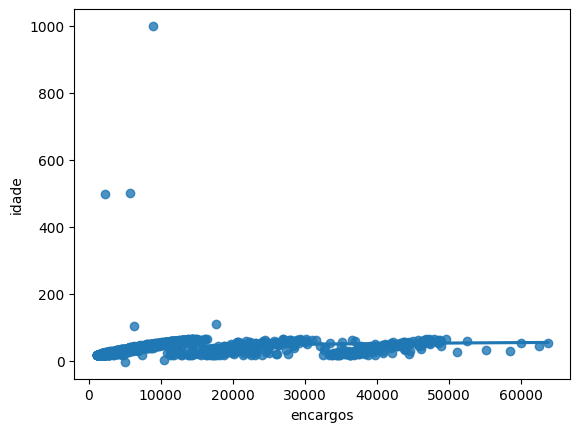

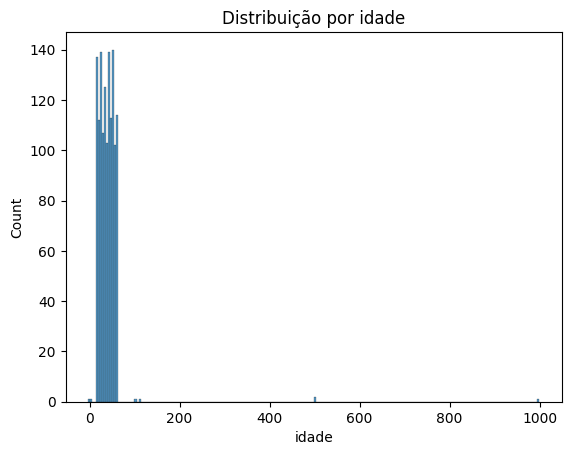

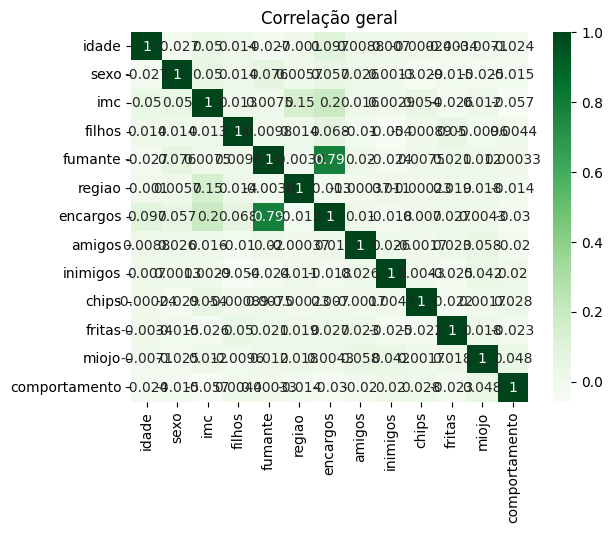

R² (Treino - Simples): 0.0102
MAE (Treino - Simples): 9267.0760
MSE (Treino - Simples): 149097596.0673
R² (Teste - Simples): 0.0024
MAE (Teste - Simples): 8703.4154
MSE (Teste - Simples): 132933456.1830


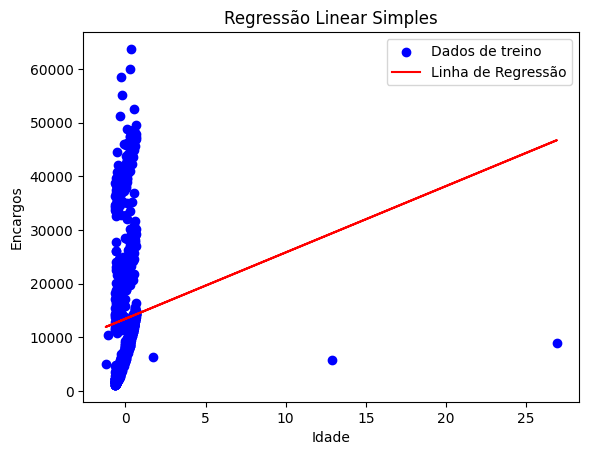

R² (Treino - Múltipla): 0.6945
MAE (Treino - Múltipla): 5017.7190
MSE (Treino - Múltipla): 46020574.4711
R² (Teste - Múltipla): 0.5833
MAE (Teste - Múltipla): 5564.5215
MSE (Teste - Múltipla): 55532189.0261


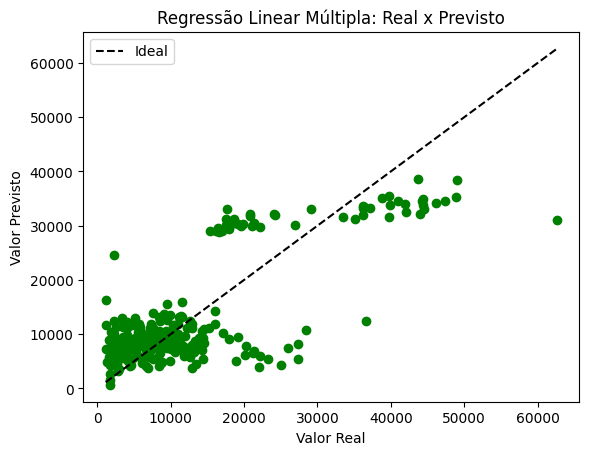

K-Fold (Erro Quadrático Médio) Scores: [-45225716.77679289 -45452424.11296744 -47155433.14088174
 -48156890.50910487 -45451785.41489094]
Média do Erro Quadrático Médio para K-Fold Cross-Validation: -46288449.9909
Desvio padrão do Erro Quadrático Médio: 1163707.7398
R² do modelo KNN (Teste): 0.6159
MAE do modelo KNN (Teste): 5131.4743
MSE do modelo KNN (Teste): 51188310.2622


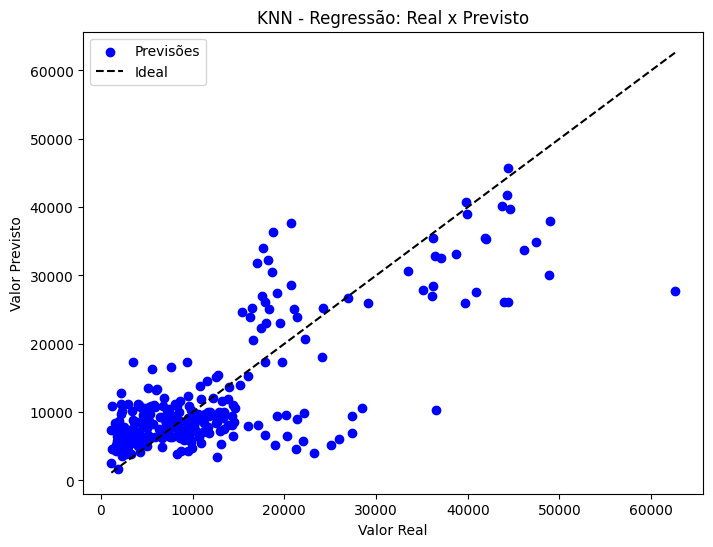

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.149686 -1.759806 -0.889084  0.052324 -0.008302  0.200941 -0.289069   
1    -1.458168 -0.827753  0.561560 -0.387506 -0.173300 -1.728326  0.302774   
2    -1.108044 -0.460658 -1.462528  0.506796  0.073645  0.678484  0.644710   
3    -0.484705 -1.019832  0.494448 -1.038823  1.381239 -1.027617  0.838710   
4     0.514903 -0.836360 -1.963942  0.626505  0.722028  0.848316 -1.607695   
...        ...       ...       ...       ...       ...       ...       ...   
1056 -1.059250  2.956156  0.366004  0.770607  0.273993  0.124332 -0.311054   
1057  1.953034 -0.773712 -0.718785  1.529100 -0.630949  0.222432 -0.634760   
1058  1.997135  0.910495 -1.329475 -0.182696 -0.758527  1.308488 -0.485280   
1059  1.562154  0.474157 -0.024180  0.168792 -0.125116 -0.073305 -0.217841   
1060 -0.585587  0.409045  0.256649 -0.763601 -0.593097 -1.519753  0.270615   

           PC8       PC9      PC10      PC11      PC12  
0    -

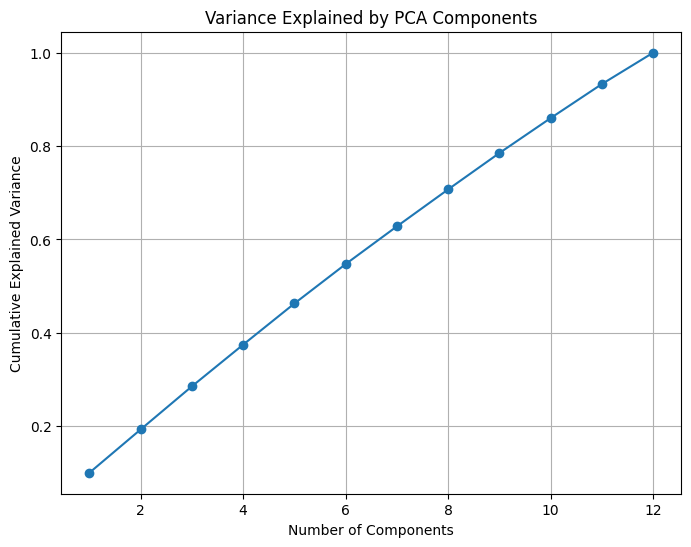

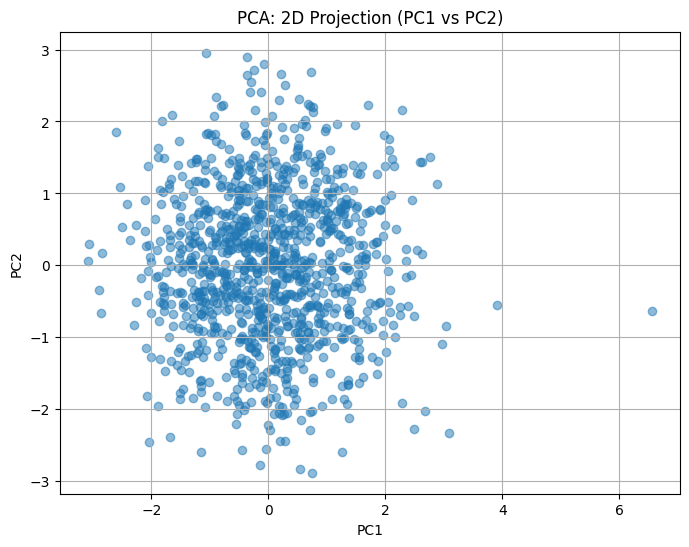

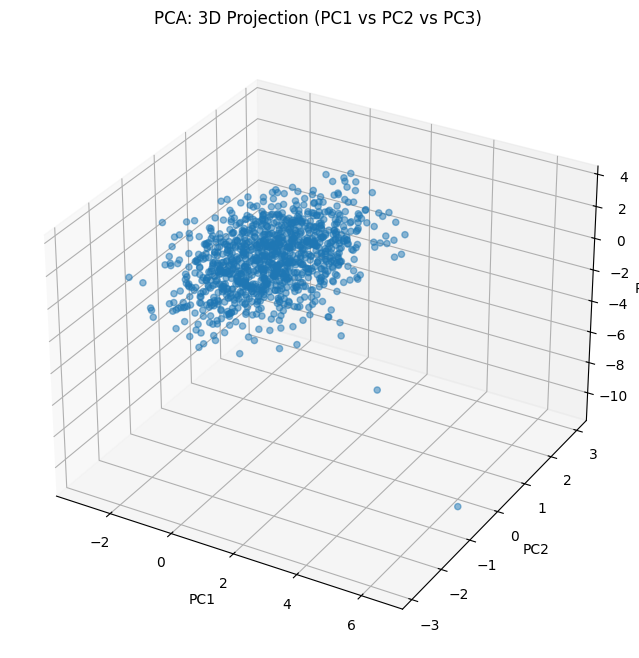

In [36]:
test()

In [32]:
# usado para rodar no terminal
# if __name__ == "__main__":
#     teste()

NameError: name 'teste' is not defined